<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C2/C2.html"><img src="../data/C2_nav.png" width="100"  style="float:right;" alt="C2"></a>
<h1> Interference and Beating</h1> 
</div>

<br/>

<p>
Following Section 2.3.3.1 of  <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, we discuss in this notebook the effect of signal interference and the phenomenon of beating.
</p> 

## Interference

In signal processing, **interference** occurs when a wave is superimposed with another wave of similar frequency. When a crest of one wave meets a crest of the other wave at some point, then the individual magnitudes add up for a certain period of time, which is known as **constructive interference**. Vice versa, when a crest of one wave meets a trough of the other wave, then the magnitudes cancel out for a certain period of time, which is known as **destructive interference**.

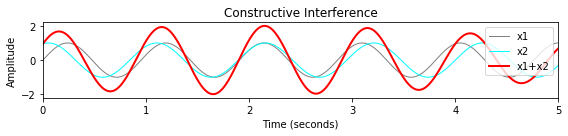

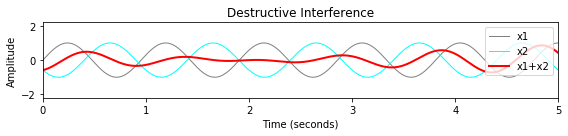

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('..')
import LibFMP.C1
%matplotlib inline

def plot_interference(x1, x2, t, figsize=(8, 2), xlim=None, ylim=None, title=''):
    """Helper function for plotting two signals and its superposition
    Notebook: C2/C2S3_InterferenceBeating.ipynb
    """    
    plt.figure(figsize=(8, 2))
    plt.plot(t, x1, color='gray', linewidth=1.0, linestyle='-', label='x1')
    plt.plot(t, x2, color='cyan', linewidth=1.0, linestyle='-', label='x2')
    plt.plot(t, x1+x2, color='red', linewidth=2.0, linestyle='-', label='x1+x2')
    if xlim is None:
        plt.xlim([0, t[-1]])
    else:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

dur = 5
x1, t = LibFMP.C1.generate_sinusoid(dur=dur, Fs=1000, amp=1, freq=1.05, phase=0.0)
x2, t = LibFMP.C1.generate_sinusoid(dur=dur, Fs=1000, amp=1, freq=0.95, phase=0.8)
plot_interference(x1, x2, t, xlim=[0, dur], ylim=[-2.2,2.2], title='Constructive Interference');

dur = 5
x1, t = LibFMP.C1.generate_sinusoid(dur=dur, Fs=1000, amp=1, freq=1.05, phase=0.0)
x2, t = LibFMP.C1.generate_sinusoid(dur=dur, Fs=1000, amp=1, freq=1.00, phase=0.4)
plot_interference(x1, x2, t, xlim=[0, dur], ylim=[-2.2,2.2], title='Destructive Interference');

## Beating

The previous figure shows that two sinusoids of similar frequency may add up (constructive interference) or cancel out (destructive interference). Let $f_1(t)=\sin(2\pi \omega_1 t)$ and $f_2(t)=\sin(2\pi \omega_2 t)$ be two such sinusoids
with distinct but nearby frequencies $\omega_1\approx\omega_2$. We now show that the superposition $f_1+f_2$ of these two sinusoids results in a function that looks like a single sine wave with a slowly varying amplitude, a phenomenon also known as **beating**. Mathematically, this phenomenon results from a **trigonometric identity** yielding 

$$
\sin(2\pi \omega_1 t)+\sin(2\pi \omega_2 t)=
2\cos\left(2\pi\frac{\omega_1-\omega_2}{2}t\right)\sin\left(2\pi\frac{\omega_1+\omega_2}{2}t\right).
$$

If the difference $\omega_1-\omega_2$ is small, the cosine term has a low frequency compared to the sine term. As a result the signal $f_1+f_2$ can be seen as a sine wave of frequency $(\omega_1+\omega_2)/2$ with a slowly varying amplitude envelope of frequency $|\omega_1-\omega_2|$. Note that this rate is twice the frequency $(\omega_1-\omega_2)/2$ of the cosine term. The following code example illustrates the beating effect.

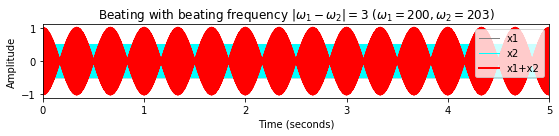

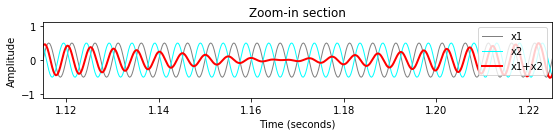

In [2]:
import IPython.display as ipd
%matplotlib inline

Fs = 4000
dur = 5
x1, t = LibFMP.C1.generate_sinusoid(dur=dur, Fs=Fs, amp=0.5, freq=200)
x2, t = LibFMP.C1.generate_sinusoid(dur=dur, Fs=Fs, amp=0.5, freq=203)
plot_interference(x1, x2, t, ylim=[-1.1,1.1], xlim=[0, dur],
    title=r'Beating with beating frequency $|\omega_1-\omega_2|=3$ ($\omega_1=200, \omega_2=203$)');
plot_interference(x1, x2, t, ylim=[-1.1,1.1], xlim=[1.115, 1.225], title=r'Zoom-in section');


ipd.display(ipd.Audio(x1+x2, rate=Fs))

## Chirp Experiment

To further illustrate the beating effect, we consider a **chirp signal** (also called **sweep signal**), in which the frequency increases with time. Let $\omega_0,\omega_1\in\mathbb{R}$ be two frequency parameters (given in Hertz) and $T\in\mathbb{R}$ a duration parameter (given in seconds). A **linear chirp** of duration $d$ that linearly increases in frequency starting with  $\omega_0$ and ending with $\omega_1$ is given by:

$$
f(t)=\sin\left(\pi\frac{\omega_1-\omega_0}{T} t^2 + 2\pi\omega_0t\right) 
$$

for $t\in[0,T]$. Note that the **instantaneous frequency** of the chirp signal $f$ at time $t$ is given by the derivate of the sinusoid's argument divided by $2\pi$:

$$
   g(t) = \frac{\omega_1-\omega_0}{T} t + \omega_0.
$$

In the following, we consider a linear chirp signal starting with frequency $\omega_0=220.0~\mathrm{Hz}$ (pitch $\mathrm{A3}$) and ending with frequency $\omega_1=311.1~\mathrm{Hz}$ (pitch $\mathrm{E}^\flat 4$) of duration $T=20~\mathrm{sec}$. Furthermore, we consider a sinusoid with frequency $261.5~\mathrm{Hz}$ (pitch $\mathrm{C4}$) of the same duration. When listening to a superposition of these signal, one first perceives the two separate pitches $\mathrm{A3}$ and $\mathrm{C4}$. When the chirp approaches $\mathrm{C4}$, the two pitches begin fusing into a single sound. At the same time, one can notice a beating effect, which first slows down, then disappears (when the chirp reaches $\mathrm{C4}$), and then speeds up again. At the end, one again perceives two pitches, now being $\mathrm{E}^\flat 4$ and $\mathrm{C4}$.

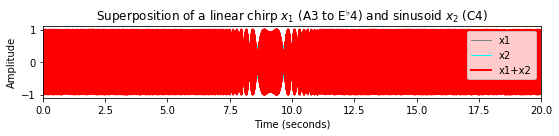

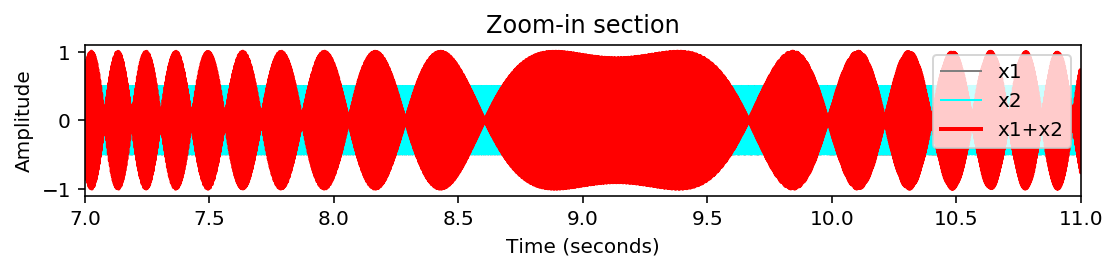

In [3]:
def generate_chirp_linear(dur, freq_start, freq_end, amp=1, Fs=22050):
    """Generation chirp with linear frequency increase

    Notebook: C2/C2S3_InterferenceBeating.ipynb

    Args:
        dur: Duration (seconds) of the signal
        freq_start: Start frequency of the chirp
        freq_end: End frequency of the chirp
        amp: amplitude of chirp
        Fs: Sampling rate

    Returns:
        x: Generated chirp signal
        t: Time axis (in seconds)
        freq: Instant frequency (in Hz)
    """    
    N = int(dur * Fs)
    t = np.arange(N) / Fs
    a = (freq_end - freq_start) / dur
    freq = a*t + freq_start
    x = amp * np.sin(np.pi * a * t ** 2 + 2 * np.pi * freq_start * t) 
    return x, t, freq

F_pitch = lambda p: 440 * 2 ** ((p - 69) / 12)

Fs = 4000
dur = 20
freq_start = F_pitch(57)   # A3
freq_end = F_pitch(63)     # Eflatp4
freq_sin = F_pitch(60)     # C4
x1, t, freq = generate_chirp_linear(dur=dur, freq_start=freq_start, freq_end=freq_end, amp=0.5, Fs=Fs)
x2, t = LibFMP.C1.generate_sinusoid(dur=dur, Fs=Fs, amp=0.5, freq=freq_sin)

y = x1 + x2
ipd.display(ipd.Audio(y, rate=Fs))
plot_interference(x1, x2, t, xlim=[0, dur], ylim=[-1.1,1.1], 
    title=r'Superposition of a linear chirp $x_1$ (A3 to E$^\flat$4) and sinusoid $x_2$ (C4)');
plot_interference(x1, x2, t, xlim=[7, 11], ylim=[-1.1,1.1], title=r'Zoom-in section');

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a>.
</div>  

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>